[51937 75113 78802 61623 51727 39537 43908 53604 55205 64967  3872]


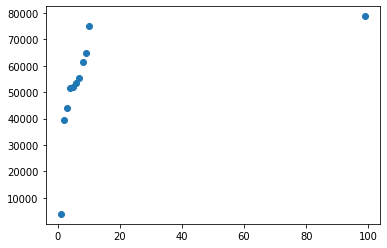

In [4]:
import numpy as np
import matplotlib.pyplot as plt

filename = './befkbhalderstatkode.csv'
people = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)


neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

def number_of_people_per_neighbourhood(n, mask):
    all_people_in_given_n = people[mask & (people[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people

mask = (people[:,0] == 2015)
peps = np.array([number_of_people_per_neighbourhood(n, mask) for n in neighb.keys()])
print(peps)
peps.sort()
plt.scatter(neighb.keys(), peps)



In [17]:

mask_over_65 = (people[:,2] == 65) & (people[:,0] == 2015)
print(mask_over_65)
mask_not_nordic = (people[:,3] != 5130) & (people[:,2] == 65) & (people[:,0] == 2015)
over_65_not_nordic = people[mask_not_nordic]
print(over_65_not_nordic[:,4].sum())

[False False False ... False False False]
4093


[62221 62583 63050 63572 64503 65856 66148 66295 66673 66877 67020 67550
 67516 67671 67351 67330 67964 68769 69951 70938 72400 73388 74521 75113]
[47854 47589 47538 47633 47734 48275 49109 49520 50312 50756 51039 51045
 50869 50643 50303 50964 51466 53351 55315 57150 58411 59211 60328 61623]


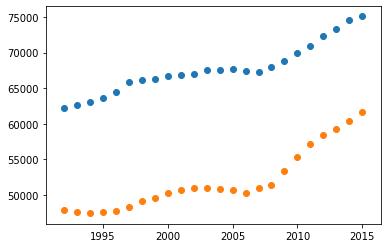

In [111]:
#Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

def number_of_people_per_year_in(n, mask):
    all_people_in_given_n = people[mask & (people[:,0] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people

years = np.array(range(1992, 2016))
mask_østerbro = (people[:,1] == 2)
mask_vesterbro = (people[:,1] == 4)
østerbro_people = np.array([number_of_people_per_year_in(year, mask_østerbro) for year in years])
vesterbro = np.array([number_of_people_per_year_in(n, mask_vesterbro) for n in years])

print(østerbro_people)
print(vesterbro)


plt.scatter(years, østerbro_people)
plt.scatter(years, vesterbro)